In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from googlefinance.client import get_price_data
%matplotlib inline

<h3> Read Data</h3><br>

In [2]:
param_GE = {'q': "GE",'x': "NYSE","p" : "1Y",'i': "86400"}
param_F = {'q': "F",'x': "NYSE","p" : "1Y",'i': "86400"}

In [3]:
df_F = get_price_data(param_F)

In [4]:
df_GE = get_price_data(param_GE)

In [5]:
df_GE.head()

,Open,High,Low,Close,Volume
2017-04-10 22:00:00,30.07,30.23,29.96,30.01,18505150
2017-04-11 22:00:00,30.00,30.10,29.84,30.04,22040223
2017-04-12 22:00:00,29.88,29.90,29.65,29.77,27041348
2017-04-13 22:00:00,29.70,29.80,29.55,29.56,19998013
2017-04-17 22:00:00,29.62,29.70,29.55,29.64,21776555


Always inspect the data

In [6]:
df_GE.head()

,Open,High,Low,Close,Volume
2017-04-10 22:00:00,30.07,30.23,29.96,30.01,18505150
2017-04-11 22:00:00,30.00,30.10,29.84,30.04,22040223
2017-04-12 22:00:00,29.88,29.90,29.65,29.77,27041348
2017-04-13 22:00:00,29.70,29.80,29.55,29.56,19998013
2017-04-17 22:00:00,29.62,29.70,29.55,29.64,21776555


In [7]:
df_GE.tail()

,Open,High,Low,Close,Volume
2018-04-02 22:00:00,13.45,13.54,12.960,13.12,72086963
2018-04-03 22:00:00,13.12,13.14,12.800,13.13,59785137
2018-04-04 22:00:00,12.82,13.30,12.790,13.28,57172424
2018-04-05 22:00:00,13.29,13.56,13.165,13.43,53526222
2018-04-06 22:00:00,13.32,13.47,12.930,13.06,63465872


<h3>Add A Column </h3><br>
Containing difference between open en closing price

In [8]:
df_GE['Range']=df_GE['Open']-df_GE['Close']
df_GE.head()

,Open,High,Low,Close,Volume,Range
2017-04-10 22:00:00,30.07,30.23,29.96,30.01,18505150,0.06
2017-04-11 22:00:00,30.00,30.10,29.84,30.04,22040223,-0.04
2017-04-12 22:00:00,29.88,29.90,29.65,29.77,27041348,0.11
2017-04-13 22:00:00,29.70,29.80,29.55,29.56,19998013,0.14
2017-04-17 22:00:00,29.62,29.70,29.55,29.64,21776555,-0.02


Calculate absolute value of the difference

In [9]:
df_GE['AbsRange'] = df_GE['Range'].apply(lambda x: np.abs(x))
df_GE.head()

,Open,High,Low,Close,Volume,Range,AbsRange
2017-04-10 22:00:00,30.07,30.23,29.96,30.01,18505150,0.06,0.06
2017-04-11 22:00:00,30.00,30.10,29.84,30.04,22040223,-0.04,0.04
2017-04-12 22:00:00,29.88,29.90,29.65,29.77,27041348,0.11,0.11
2017-04-13 22:00:00,29.70,29.80,29.55,29.56,19998013,0.14,0.14
2017-04-17 22:00:00,29.62,29.70,29.55,29.64,21776555,-0.02,0.02


<h3>Sorting the results</h3>

In [10]:
df_GE.sort_values(by='AbsRange',inplace=True,ascending=False)
df_GE.head()

,Open,High,Low,Close,Volume,Range,AbsRange
2017-07-31 22:00:00,0.00,25.69,0.0000,25.61,30616287,-25.61,25.61
2017-10-20 22:00:00,22.14,23.84,22.1000,23.83,192404370,-1.69,1.69
2017-11-13 22:00:00,20.26,20.75,18.7501,19.02,261557413,1.24,1.24
2017-10-23 22:00:00,23.44,23.44,22.1800,22.32,187340912,1.12,1.12
2017-11-14 22:00:00,18.79,18.88,17.4600,17.90,312556809,0.89,0.89


<h3> Boolean Indexing </h3>
Find the dates where the difference is > 60 Cents

In [11]:
idx = df_GE['AbsRange']>0.6
df_GE.loc[idx,:]

,Open,High,Low,Close,Volume,Range,AbsRange
2017-07-31 22:00:00,0.00,25.690,0.0000,25.61,30616287,-25.61,25.61
2017-10-20 22:00:00,22.14,23.840,22.1000,23.83,192404370,-1.69,1.69
2017-11-13 22:00:00,20.26,20.750,18.7501,19.02,261557413,1.24,1.24
2017-10-23 22:00:00,23.44,23.440,22.1800,22.32,187340912,1.12,1.12
2017-11-14 22:00:00,18.79,18.880,17.4600,17.90,312556809,0.89,0.89
2017-11-15 22:00:00,17.51,18.380,17.5000,18.26,144368004,-0.75,0.75
2018-02-08 22:00:00,15.19,15.205,14.4500,14.45,138636134,0.74,0.74
2017-04-21 22:00:00,30.27,30.380,29.4500,29.55,72351353,0.72,0.72
2017-10-09 22:00:00,24.10,24.150,23.2500,23.43,140302771,0.67,0.67
2017-06-13 22:00:00,29.12,29.160,28.3400,28.45,58823660,0.67,0.67


<h3>Comparing with Ford<h3>

In [12]:
df = pd.concat([df_GE['Close'],df_F['Close']],axis=1)
df.columns = ['GE','F']
df.head()

,GE,F
2017-04-10 22:00:00,30.01,11.25
2017-04-11 22:00:00,30.04,11.28
2017-04-12 22:00:00,29.77,11.23
2017-04-13 22:00:00,29.56,11.11
2017-04-17 22:00:00,29.64,11.28


Calculate the difference between the return of GE and F

In [13]:
df_ret = df.pct_change(periods=1)
df_ret['Diff']= df_ret['GE']-df_ret['F']
df_ret['Diff']=df_ret['Diff'].apply(lambda x : np.abs(x))
df_ret.head()

,GE,F,Diff
2017-04-10 22:00:00,NaN,NaN,NaN
2017-04-11 22:00:00,0.001000,0.002667,0.001667
2017-04-12 22:00:00,-0.008988,-0.004433,0.004555
2017-04-13 22:00:00,-0.007054,-0.010686,0.003632
2017-04-17 22:00:00,0.002706,0.015302,0.012595


<h3>Graph</h3>

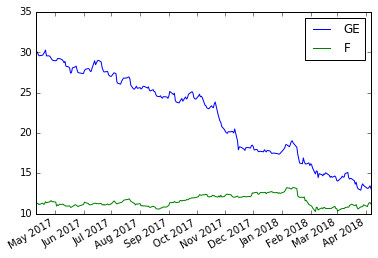

In [14]:
df.plot();